In [5]:
using ChaoticMessages
using Plots
using DifferentialEquations
using LaTeXStrings

An example of a synchronized chaotic system is given by 

\begin{align*}
\dot{x_T} &= \sigma (y_T - x_T), \\ 
\dot{y_T} &= rx_T - y_T - 20 x_T z_T, \\ 
\dot{z_T} &= 5 x_T y_T - bz_T,
\end{align*}

which is the transmitter's dynamical system and 

\begin{align*}
\dot{x_R} &= \sigma (y_R - x_R), \\ 
\dot{y_R} &= rx_T - y_R - 20 x_T z_R, \\ 
\dot{z_R} &= 5 x_T y_R - bz_R,
\end{align*}

These pair of systems can be used to send secret messages. 

We give a numerical example of synchronization and the error between the transmitter's dynamical system and the receiver's dynamical system going to zero for the x-component.

We first find the solution to the transmitter's dynamical system with parameters $\sigma = 16$, $r=45.6$, and $b=4$ with initial condition $[16.0, 4.0, 45.6]$. 

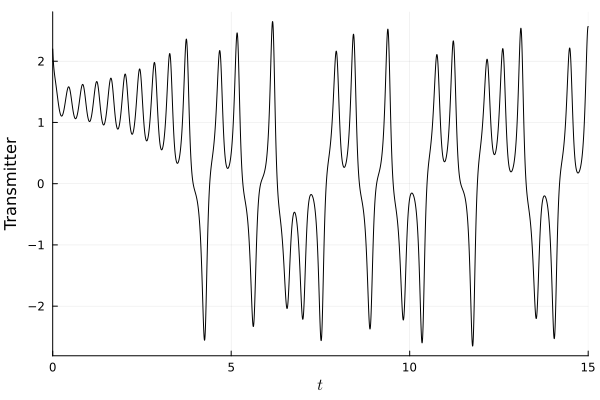

In [6]:
u0 = [2.2,1.3,2.0] # initial conditions 
p = [16.0;4.0;45.6] # parameters 
tspan = (0.0,15.0) # time span 

# Set up the ODE problem (for lorenz_transmitter!) and solve it 
prob_T = ODEProblem(lorenz_transmitter!, u0, tspan, p)
sol_transmitter = solve(prob_T, AutoTsit5(Rodas4P()), abstol = 1e-11, reltol = 1e-11)

# Plot only the x-component of the solution for transmitter's dynamical system 
transmitter_plot = plot(sol_transmitter, idxs = (0, 1), legend = false, xaxis=L"t", yaxis="Transmitter",linecolor="black")
display(transmitter_plot)

Next, we find the solution to the receiver's dynamical system with the same parameters $\sigma = 16$, $r=45.6$, and $b=4$ as before, but with different initial condition $[10.2,7.3,6.0]$. Also, notice that in the definition of the receiver's system, we are using $x_T$ which is the $x$-coordinate of the transmitter's dynamical system. Hence, the receiver's dynamical system have some information about the transmitter's dynamical system. 

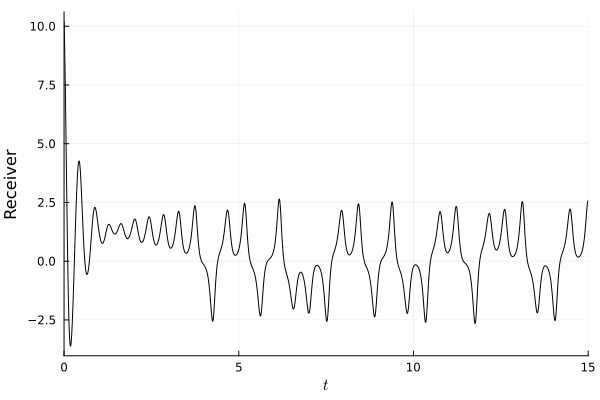

In [7]:
# Get only the x-coordinates of the solution 
x_at_time_t_transmitter(t) = sol_transmitter(t,idxs=1) 

u0 = [10.2,7.3,6.0] # Different intial conditions 

receiver! = lorenz_receiver!(x_at_time_t_transmitter)

# Set up the ODE problem (for parameterized_lorenz_receiver!) and solve it 
prob_R = ODEProblem(receiver!,u0,tspan,p) # reusing the same parameters 
sol_receiver = solve(prob_R, AutoTsit5(Rodas4P()), abstol = 1e-11, reltol = 1e-11)

# Plot only the x-component of the solution for receiver's dynamical system 
receiver_plot = plot(sol_receiver, idxs = (0, 1), legend = false, xaxis=L"t", yaxis="Receiver",linecolor="black")
display(receiver_plot)

Lastly, we plot the absolute error between the $x$-component of the receiver's dynamical system and the transmitter's dynamical system. We see that the error converge to zero which means the pair of dynamical system synchronize despite starting at different initial conditions. Also, it has been shown that the error converge to zero in $O(t^2)$ time. The idea behind sending secret messages using chaotic dynamical systems is to encode a message in $x_T$ and having the receiver's dynamical system reproduce the message by its synchronization! 

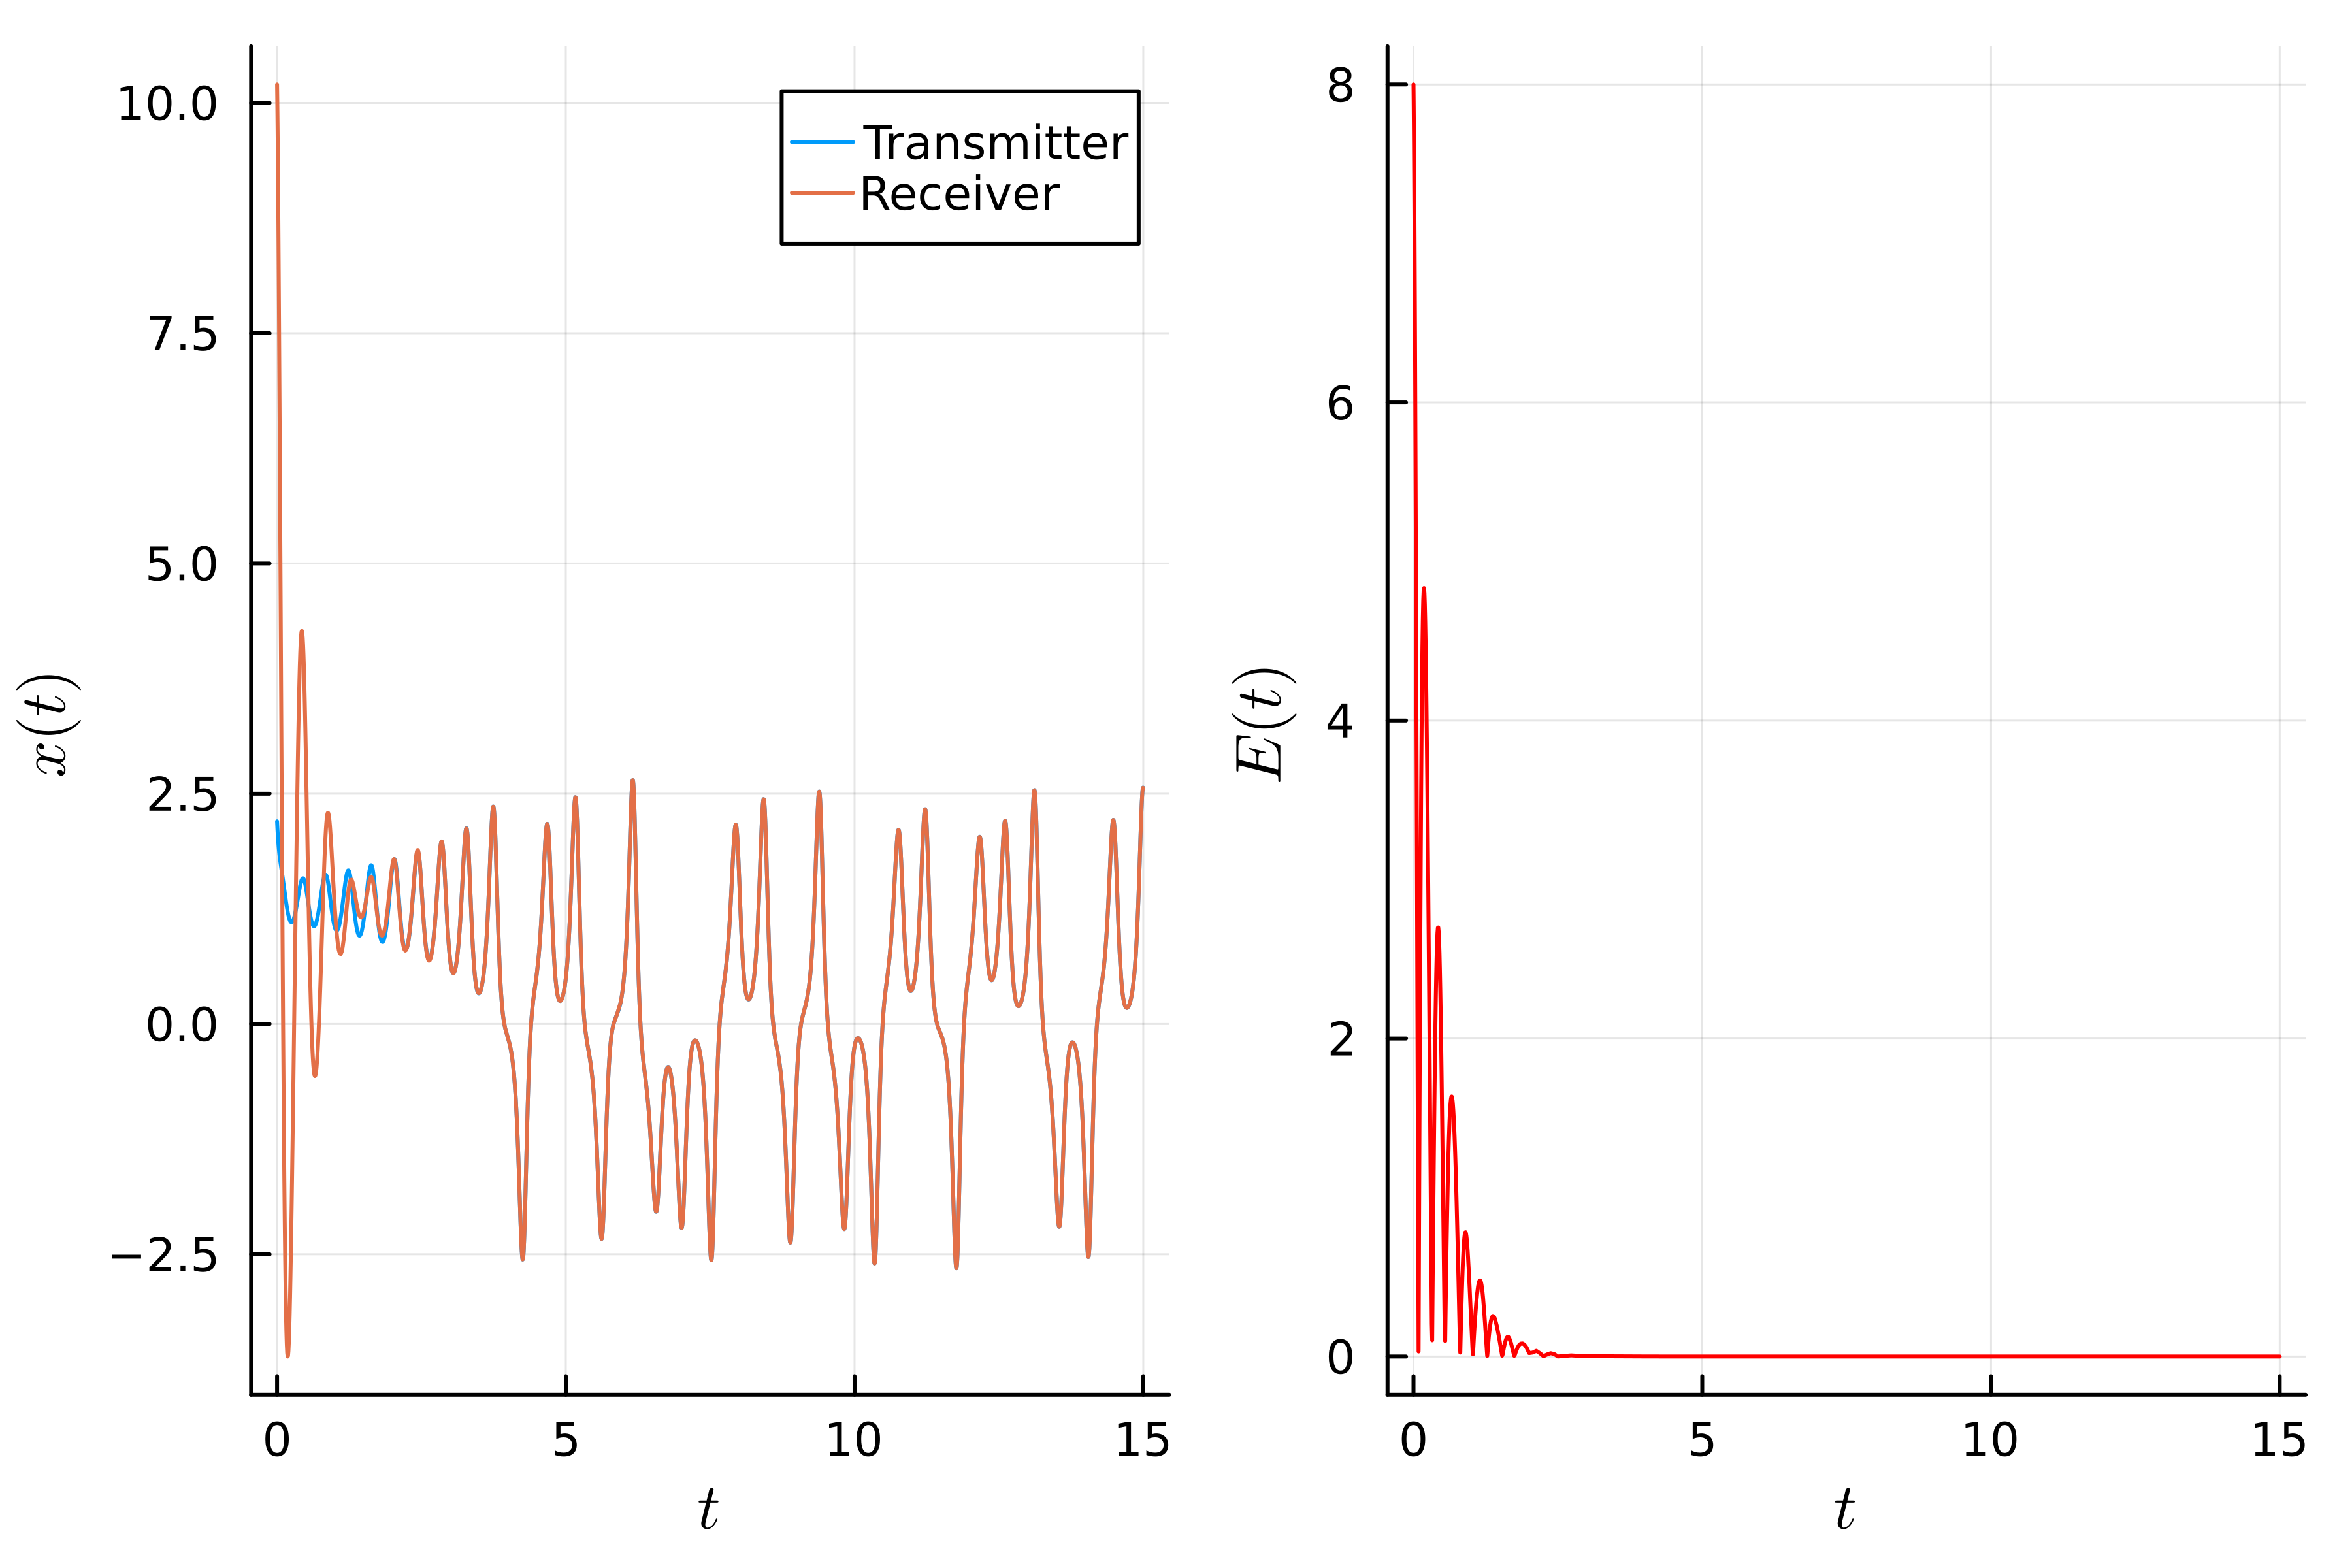

In [8]:
# Get only the x-coordinates of the receiver 
x_at_time_t_receiver(t) = sol_receiver(t,idxs=1) 

# Plot the errors and the x-coordinates of the solutions 
abs_error = error_set_up(x_at_time_t_transmitter, x_at_time_t_receiver)

error_plot = plot(abs_error, tspan..., legend = false, xaxis=L"t", yaxis=L"E(t)",linecolor="red")
x_coord_plot = plot(x_at_time_t_transmitter, tspan...,label="Transmitter",xaxis=L"t",yaxis=L"x(t)")
plot!(x_at_time_t_receiver, tspan...,label="Receiver")

combined_plot = plot(x_coord_plot, error_plot, dpi=600)
display(combined_plot)